In [11]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tensorflow import keras
np.set_printoptions(threshold=np.inf)

In [50]:
directory = './samples/'

target_filenames = ['100.csv', '150.csv', '200.csv', '250.csv','280.csv', '300.csv', '350.csv', '400.csv']
x,y=[],[]
for filename in target_filenames:
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):  # Check if the file exists
        f = pd.read_csv(filepath, delimiter='\t')
        x.append(f.drop(columns=['channel', 'experimental', 'smoothed', 'Au', '197Au']).values)
        y.append(int(filename.replace('.csv', '')))  # Extract the numeric value from the filename

print("X Data:")
for data in x:
    print(data)
print("\nY Labels:", y)

X Data:
[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [

In [51]:
Xx = []
for array in x:
    min_val = np.min(array)
    max_val = np.max(array)
    normalized_array = (array - min_val) / (max_val - min_val)
    Xx.append(normalized_array)

X = np.array(Xx)
Y = np.array(y)

In [52]:
x_train, x_test, labels_train, labels_test = train_test_split(X, Y, test_size = 1, random_state = 2)

print('Numero de espetros: '+ str(len(X)))
print('Numero de bins em cada espetro: '+str(len(X[0])))
print("Normalized test spectrum\n", x_test)
print('\n')
print("Label test\n", labels_test)

Numero de espetros: 8
Numero de bins em cada espetro: 1878
Normalized test spectrum
 [[[0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]
  [

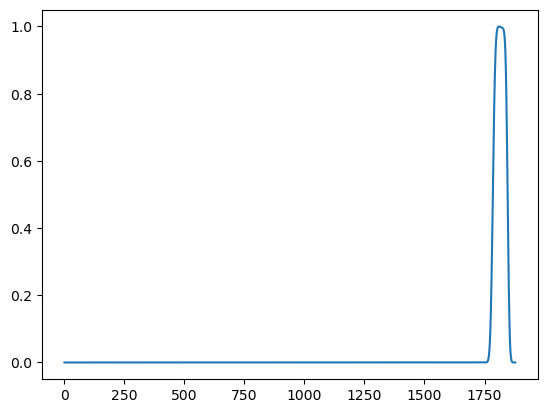

In [53]:
plt.plot(np.arange(1,1879), x_test[0])

In [57]:
model=keras.models.Sequential(
    [keras.layers.Dense(64,activation='relu',input_shape=(1878,)),
     keras.layers.Dense(32,activation='relu'),
     keras.layers.Dense(1,activation='linear')]
     )

model.compile(
    loss='mean_squared_error', optimizer='adam', metrics=['mae']
)

epochs = 100
batch_size = 32

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                120256    
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 122369 (478.00 KB)
Trainable params: 122369 (478.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.fit(x_train,labels_train,epochs=epochs,batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 7ms/step - loss: 26336.7090 - mae: 149.6845
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 25499.2363 - mae: 147.2473
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 24665.6035 - mae: 144.7813
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 23836.5449 - mae: 142.2870
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 23012.8145 - mae: 139.7655
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 22195.1562 - mae: 137.2174
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 21384.3281 - mae: 134.6438
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 20581.0801 - mae: 132.0457
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 19786.1758 - mae: 129.4240
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 19000.3613 - mae: 126.7800
Epoch 11/100
1/1 [=

In [62]:
loss, mae = model.evaluate(x_test, labels_test)
print("Mean Absolute Error:", mae)

1/1 [==============================] - 0s 20ms/step - loss: 3.2397 - mae: 1.7999
Mean Absolute Error: 1.7999267578125
